# Metropolis Sampling Algorithm



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# Target mean:
target_mean = np.array([2, 3])
# Target variance:
target_var = np.array([[1, 1.5],[1.5, 3]])
# Inverse of target_variance
target_var_inv = np.linalg.inv(target_var)

# Eigenvalues and eigenvectors of covariance to plot the confidence ellipse
# and to initilaise the proposal variance.
evalues, evectors = np.linalg.eig(target_var)
esort = np.argsort(evalues)

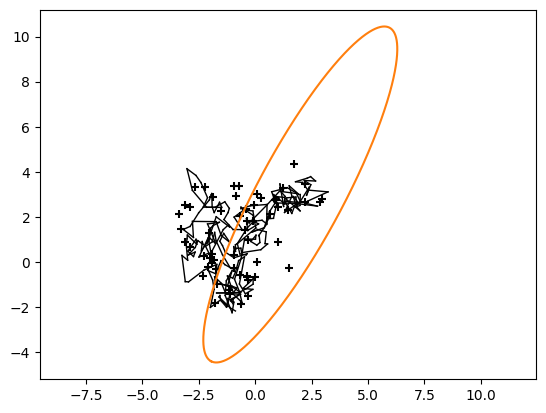

In [3]:
# Proposal variance:
proposal_var = evalues[esort[0]]* np.identity(2)

# Length of Markov chain
N = 300

start = target_mean
plt.plot(start[0], start[1])
samples = [start]
# Evaluate unnormalized probability distribution.
last = np.exp(-0.5*(samples[0] - target_mean).T @ target_var_inv
              @ (samples[0] - target_mean))
counter = [1];
total = 1;
accepted = 1
while total < N:
  # Generate candidate from the multivariate normal distribution with mean
  # being the last accepted sample and the proposal variance.
  candidate = np.random.multivariate_normal(samples[accepted-1], proposal_var)
  # Evaluate unnormalized probability distribution.
  new = np.exp(-0.5*(samples[accepted - 1] - candidate).T @ target_var_inv
               @ (samples[accepted - 1] - candidate))
  # Calculate acceptance probability.
  accept = min(1,new/last)
  # Check whether candidate is accepted.
  if (accept > np.random.uniform()):
    # Draw path of random walk.
    plt.plot([samples[accepted-1][0], candidate[0]],
             [samples[accepted-1][1], candidate[1] ], 'k',
             linewidth =1)
    # Update Markov chain.
    samples = np.vstack((samples,candidate))
    counter = np.vstack((counter,[1]))
    accepted = accepted +1
    last = new
  else:
    # Plot rejected candidate.
    plt.scatter(candidate[0], candidate[1], c = 'k', marker = '+')
    # Increase the counter for the current sample.
    counter[accepted-1] = counter[accepted-1]+1
  total = total+1
#print(samples)
# Specify confidence ( 0 <= p <= 1).
p = 0.99
chisquare_val = np.sqrt(scipy.stats.chi2.ppf(p,7))

theta = np.linspace(0, 2*np.pi, 1000);
ellipsis = chisquare_val * (np.sqrt(evalues[None,:]) *
                            evectors) @ [np.sin(theta), np.cos(theta)]
ellipsis = ellipsis + np.repeat(np.atleast_2d(target_mean).T,1000, axis = 1)
plt.plot(ellipsis[0,:], ellipsis[1,:])
plt.axis('equal')
plt.show()